<a href="https://colab.research.google.com/github/AngelD40804/Machine-Learning-Fundamentals/blob/LAB4/LAB04_PCA_ANGEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R = np.matmul(X,X.T)/3
# print(R)

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)
# call SINGLE VARIANCE DECOMPOSITION decomposition,
# WHERE U AND V satisfy the condition UU^H = 1 AND VV^H=1 ,
# AND D is the diagonal matrix

# new basis vectors
u1=U[:,0] #vector in direction of the highest variance
u2=U[:,1] #vector in direction of the second highest variance, octogonal to u1

# Calculate the coordinates in new orthonormal basis:
xi1 = np.matmul(np.transpose(X),u1)
xi2 = np.matmul(np.transpose(X),u2)

print(xi1)
print(xi2)
# Calculate the approximation of the original from new basis
x_aprox = u1*xi1.T + u2*xi2.T
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original


[-4.46716435 -3.14809647  0.        ]
[-0.21081425  0.29914646  0.        ]


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

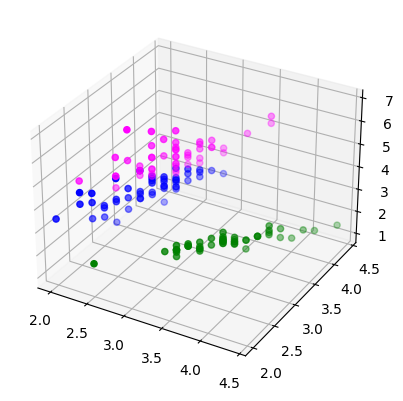

In [ ]:
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


-1.3402265266227635
1.0190043519716065
-1.3402265266227635
-0.1319794793216258
0.2
5.1
0.2
4.9
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


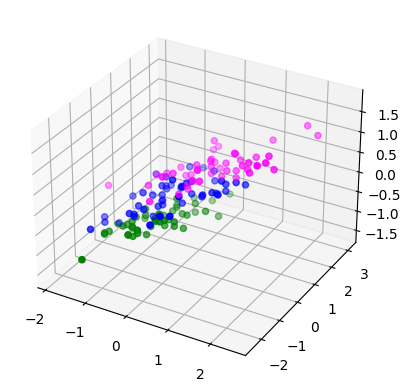

In [ ]:

# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

print(np.min(Xpp[0,:]))
print(np.max(Xpp[0,:]))
print(np.min(Xpp[1,:]))
print(np.max(Xpp[1,:]))

print(np.min(X[0,:]))
print(np.max(X[0,:]))
print(np.min(X[1,:]))
print(np.max(X[1,:]))

# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
plt.show

from sklearn import decomposition
# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())

In [ ]:
pca.explained_variance_



array([2.93808505, 0.9201649 , 0.14774182])

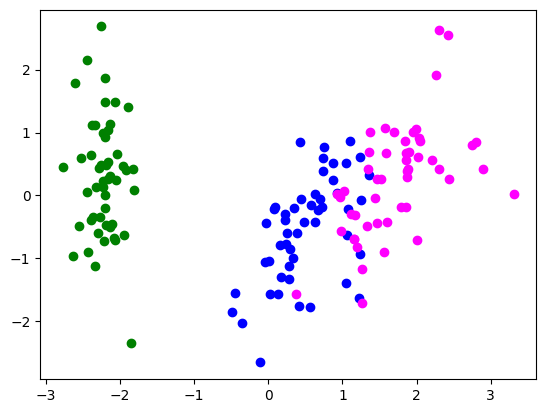

In [ ]:
plt.scatter(Xpca[y==0,0], Xpca[y==0,1], color = 'green')
plt.scatter(Xpca[y==1,0], Xpca[y==1,1], color = 'blue')
plt.scatter(Xpca[y==2,0], Xpca[y==2,1], color = 'magenta')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# print(X_train.shape)
# print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)

knn1.fit(X_train, y_train)
Ypred =knn1.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test, Ypred)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)


# Individual tasks:
# 1. KNN on original data X
# 2. KNN on Xpca (comlumns0,1)
# 3. KNN on X column 0,1
# 4. knn on XPCA(column 0)

In [ ]:
# 1. KNN on original data X


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# print(X_train.shape)
# print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)

knn1.fit(X, y)
Ypred =knn1.predict(X)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y, Ypred)
ConfusionMatrixDisplay.from_predictions(y, Ypred)


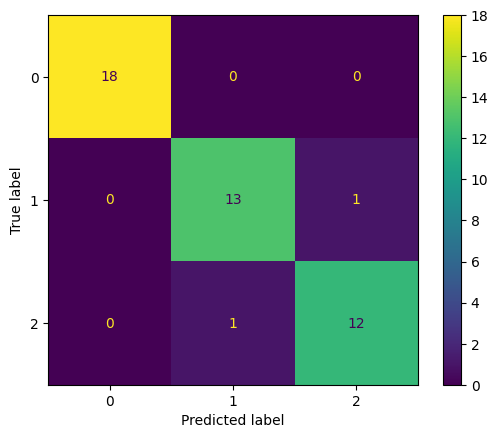

In [ ]:
# 2. KNN on Xpca (comlumns0,1)
Xpca2 = Xpca[:,0:1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xpca2, y, test_size = 0.3)

# print(X_train.shape)
# print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)

knn1.fit(X_train2, y_train2)
Ypred =knn1.predict(X_test2)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test2, Ypred)
ConfusionMatrixDisplay.from_predictions(y_test2, Ypred)

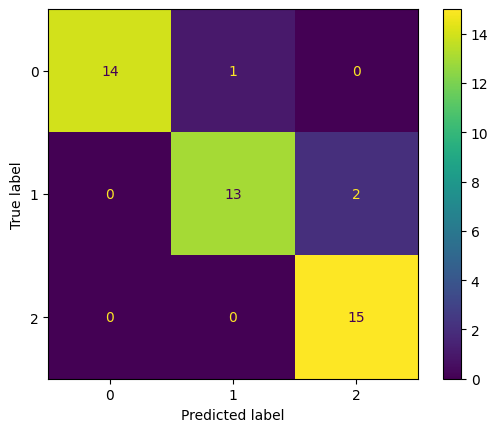

In [ ]:
# 2. KNN on Xpca (comlumns0,1)
Xpca2 = Xpca[:,0:2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xpca2, y, test_size = 0.3)

# print(X_train.shape)
# print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)

knn1.fit(X_train2, y_train2)
Ypred =knn1.predict(X_test2)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test2, Ypred)
ConfusionMatrixDisplay.from_predictions(y_test2, Ypred)

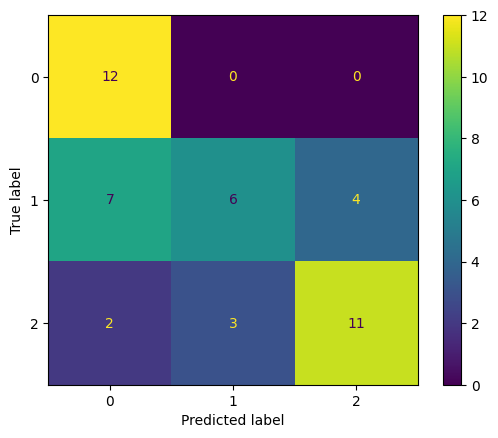

In [ ]:
# 3. KNN on X column 0,1
X3 = X[:,0:1]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size = 0.3)

# print(X_train.shape)
# print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)

knn1.fit(X_train3, y_train3)
Ypred =knn1.predict(X_test3)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test3, Ypred)
ConfusionMatrixDisplay.from_predictions(y_test3, Ypred)